In [30]:
library(tidyverse) 
library(broom) 
library(caret) 
library(psych) 
library(corrplot) 
library(caTools)
library(ggplot2)
library(cowplot)

In [3]:
insurance <- read.csv("C:/Users/Jeson/Documents/R/insurance.csv")
head(insurance)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [4]:
glimpse(insurance)

Observations: 1,338
Variables: 7
$ age      <int> 19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27...
$ sex      <fct> female, male, male, male, male, female, female, female, ma...
$ bmi      <dbl> 27.900, 33.770, 33.000, 22.705, 28.880, 25.740, 33.440, 27...
$ children <int> 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0...
$ smoker   <fct> yes, no, no, no, no, no, no, no, no, no, no, yes, no, no, ...
$ region   <fct> southwest, southeast, southeast, northwest, northwest, sou...
$ charges  <dbl> 16884.924, 1725.552, 4449.462, 21984.471, 3866.855, 3756.6...


In [5]:
summary(insurance)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

In [6]:
any(is.na(insurance))

num.cols <- sapply(insurance, is.numeric)
cor.data <- cor(insurance[,num.cols]) 
cor.data

[1] FALSE

,age,bmi,children,charges
age,1.0000000,0.1092719,0.04246900,0.29900819
bmi,0.1092719,1.0000000,0.01275890,0.19834097
children,0.0424690,0.0127589,1.00000000,0.06799823
charges,0.2990082,0.1983410,0.06799823,1.00000000


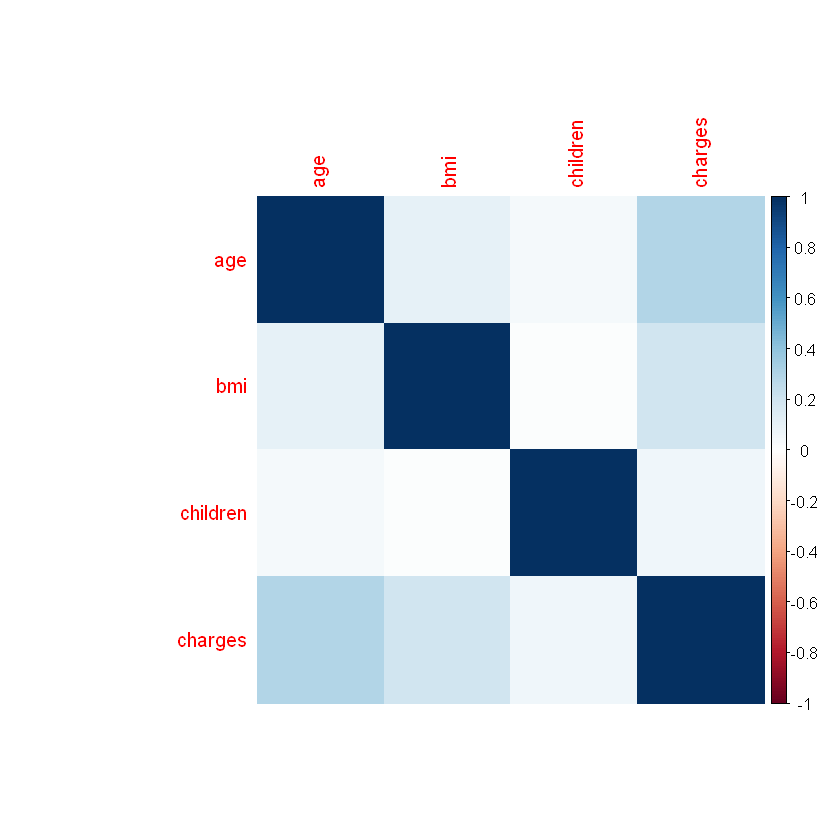

In [7]:
corrplot(cor.data, method = 'color')

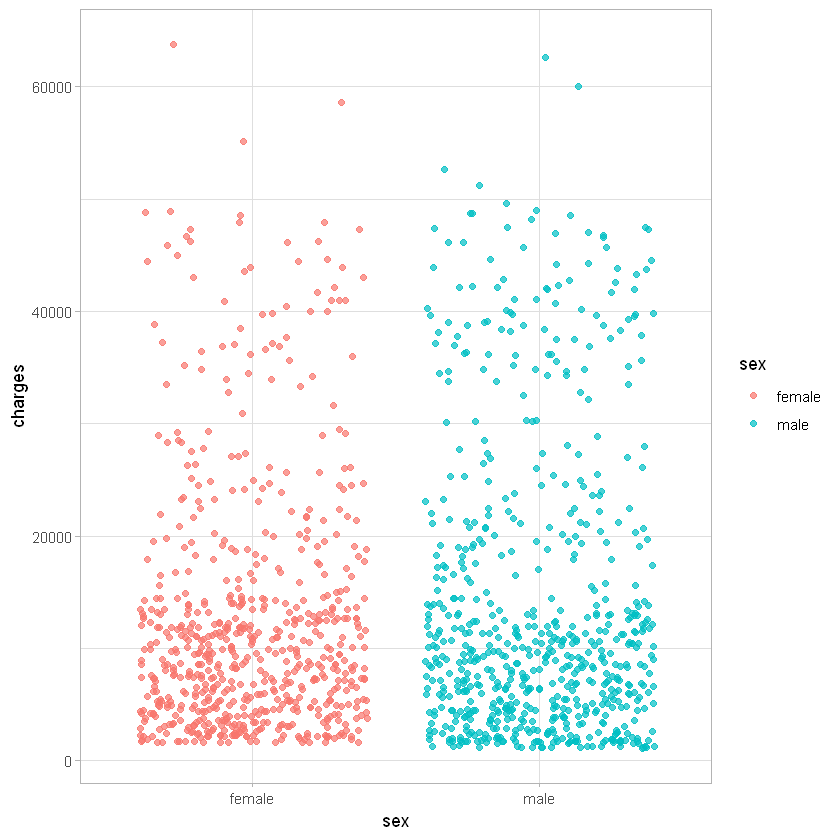

In [21]:
x <- ggplot(insurance, aes(sex, charges)) +
  geom_jitter(aes(color = sex), alpha = 0.7) +
  theme_light()

p <- plot_grid(x)
p

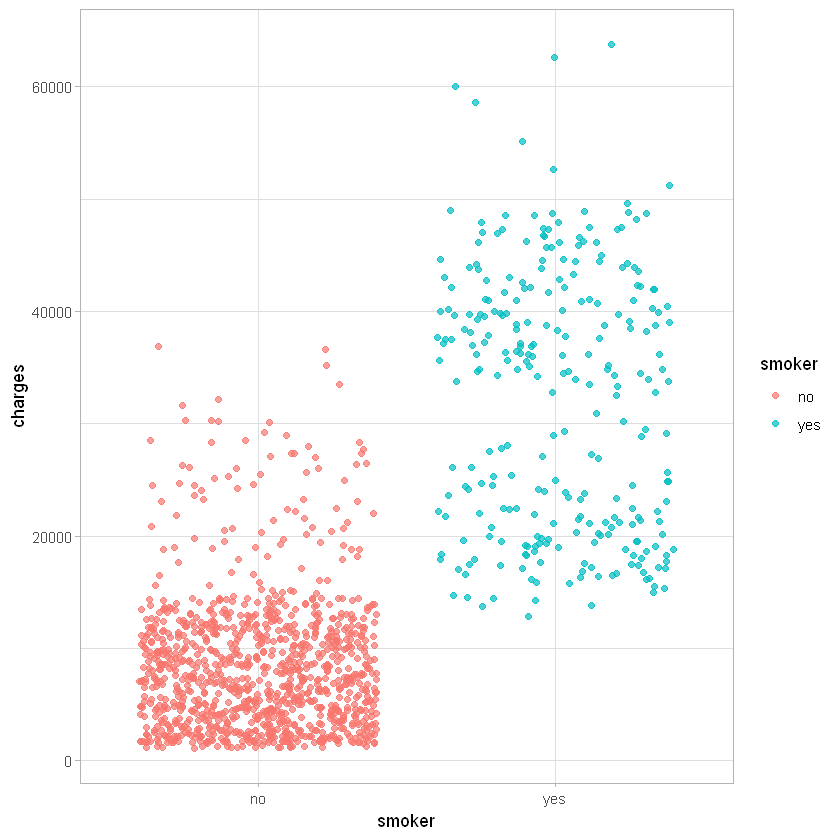

In [23]:
x <- ggplot(insurance, aes(smoker, charges)) +
  geom_jitter(aes(color = smoker), alpha = 0.7) +
  theme_light()

p <- plot_grid(x)
p

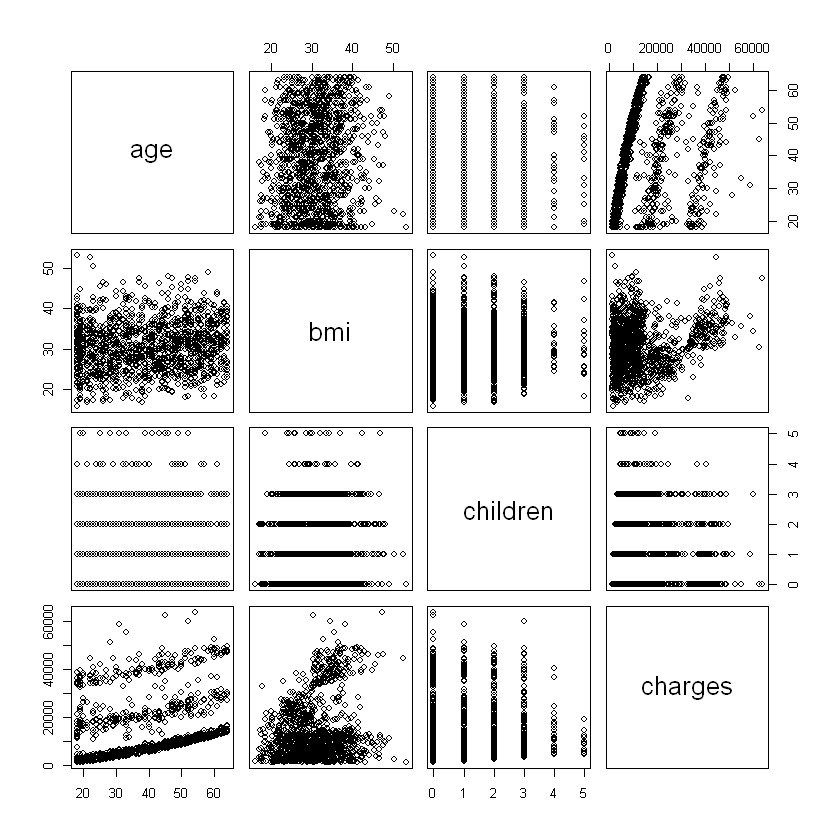

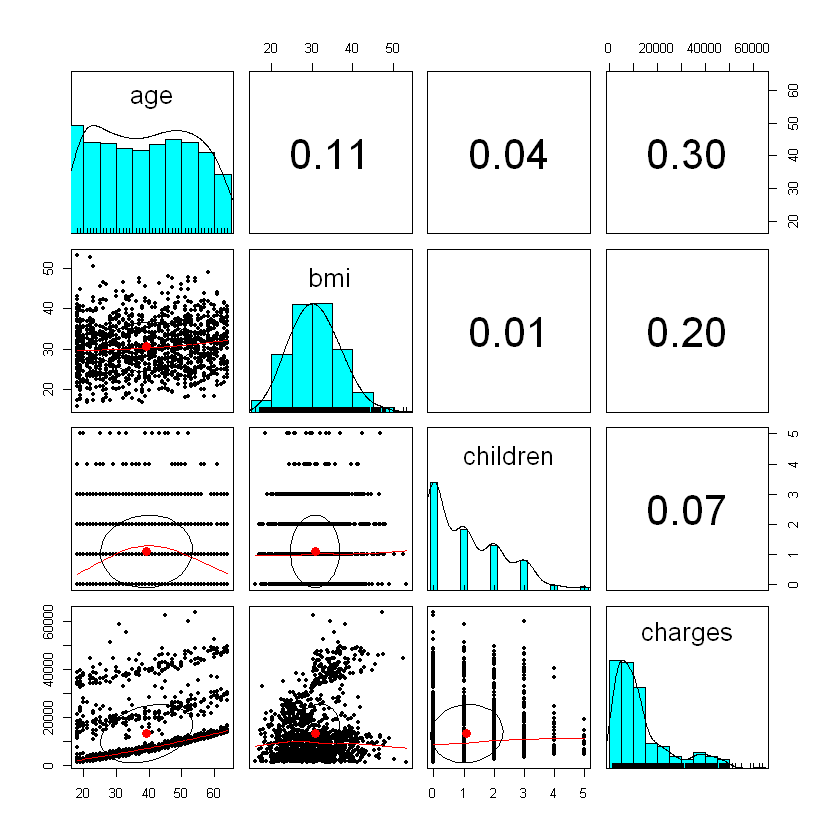

In [24]:
pairs(insurance[,num.cols])
pairs.panels(insurance[,num.cols])

In [25]:
set.seed(1234)
ins_vars <- insurance %>% select(-sex)

sample <- createDataPartition(ins_vars$smoker, p = 0.8, list = FALSE)

training <- ins_vars[sample, ]
testing <- ins_vars[-sample, ]

model <- train(charges ~ ., method = "lm", data = training, trControl = trainControl(method = "none"))
summary(model)
res <- as.data.frame(residuals(model))
head(res)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11602.6  -2866.0   -878.4   1696.2  29715.4 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -12945.25    1079.79 -11.989  < 2e-16 ***
age                263.65      13.25  19.900  < 2e-16 ***
bmi                363.95      31.35  11.611  < 2e-16 ***
children           460.42     152.42   3.021  0.00258 ** 
smokeryes        24192.41     455.18  53.149  < 2e-16 ***
regionnorthwest   -721.74     521.87  -1.383  0.16696    
regionsoutheast  -1283.38     524.26  -2.448  0.01453 *  
regionsouthwest   -866.76     530.43  -1.634  0.10254    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5998 on 1064 degrees of freedom
Multiple R-squared:  0.7619,	Adjusted R-squared:  0.7603 
F-statistic: 486.4 on 7 and 1064 DF,  p-value: < 2.2e-16


,residuals(model)
X2,-1542.3825
X4,18687.6039
X5,-1413.7214
X6,444.1267
X7,-2289.4660
X8,-283.6926


In [26]:
ChargesPredictions <- predict(model, testing)
result <- as.data.frame(cbind(ChargesPredictions,testing$charges))
colnames(result) <- c('pred','real')
head(result)

,pred,real
1,25543.845,16884.924
3,6545.048,4449.462
10,11556.406,28923.137
19,15619.430,10602.385
22,6349.765,4149.736
24,32288.843,37701.877


In [27]:
mse <- mean((result$real - result$pred)^2) 
print(mse)
mse^0.5

SSE = sum((result$pred - result$real)^2) 
SST = sum( (mean(ins_vars$charges) - result$real)^2) 
R2 = 1 - SSE/SST 
R2

[1] 40156193


[1] 6336.891

[1] 0.6974547

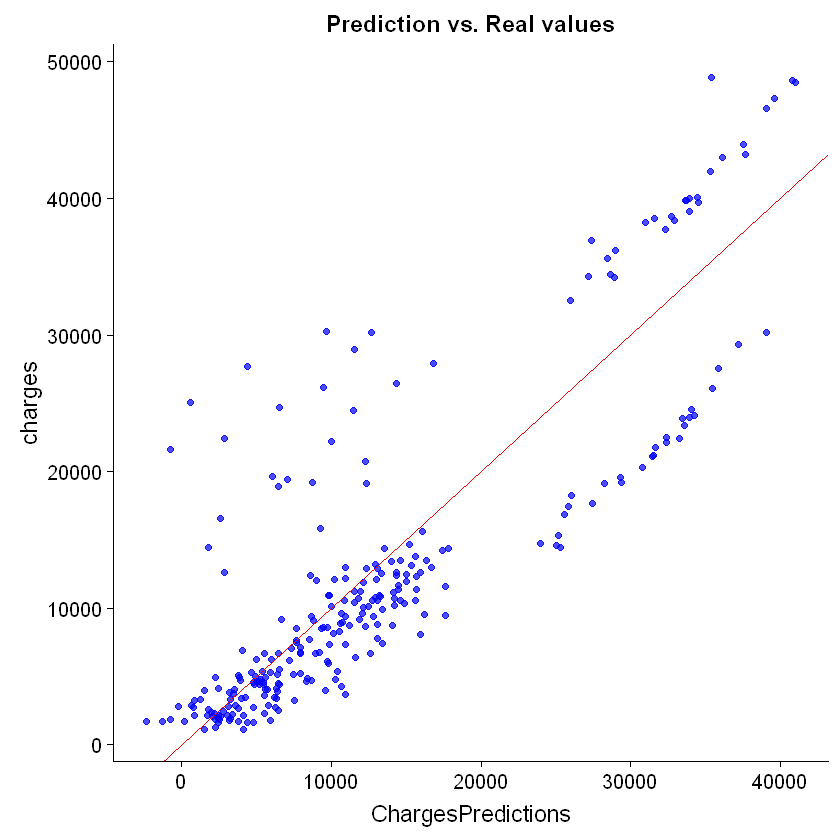

In [28]:
ggplot(testing, aes(x = ChargesPredictions, y = charges)) + 
  geom_point(color = "blue", alpha = 0.7) + 
  geom_abline(color = "red") +
  ggtitle("Prediction vs. Real values")


In [29]:
Bob <- data.frame(age = 19,
                  bmi = 27.9,
                  children = 0,
                  smoker = "yes",
                  region = "northwest")
print(paste0("Health care charges for Bob: ", round(predict(model, Bob), 2)))

[1] "Health care charges for Bob: 25688.86"
